### Libraries

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt

Global Variables

In [19]:
pca_components = 10
dataset_path = '../data/training.csv'

### Import training data

In [20]:
df = pd.read_csv(dataset_path)
display(df.head())
print('shape', df.shape)

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_540,Feature_541,Feature_542,Feature_543,Feature_544,Feature_545,Feature_546,Feature_547,Feature_548,Target
0,0.144231,0.105263,0.9000,0.66665,0.93750,0.0,0.0,NaN,NaN,0.56250,...,0.216696,0.0000,0.000000,Orcs,0.3,0.0,0.294118,0.111111,0.0,0
1,0.115385,0.000000,0.8750,0.00000,0.94000,0.0,0.0,0.0,0.028192,0.56000,...,0.058615,0.0105,0.000000,Goblins,0.1,1.0,0.235294,0.222222,1.0,0
2,0.076923,0.000000,0.8750,0.50000,0.86665,0.0,1.0,0.0,0.027882,0.63335,...,0.000000,0.0000,0.263682,Uruk-hai,0.4,0.0,0.117647,0.222222,0.0,0
3,0.076923,0.000000,0.8750,0.00000,0.71430,0.0,0.0,0.0,NaN,0.78570,...,0.000000,0.0000,0.000000,Goblins,0.0,1.0,0.117647,0.222222,0.0,0
4,0.528846,0.263158,0.9375,0.87500,0.93135,0.0,1.0,0.0,0.027882,0.56865,...,0.033748,0.0130,0.094527,Uruk-hai,0.3,1.0,0.117647,0.666667,1.0,0


shape (2563, 549)


In [21]:
X = df.drop('Target', axis=1)
y = df['Target'].copy()

print('X:', X.shape, 'y:', y.shape)

X: (2563, 548) y: (2563,)


### Hot Encoder for categorical values

In [22]:
# Work with non-numeric features
X_objects_features = X.select_dtypes(include=['object'])

X_encoded = pd.get_dummies(X_objects_features)
display(X_encoded.head())

,Feature_82_Barad-dur Log,Feature_82_Beleriand Ballad,Feature_82_Bree Chronicle,Feature_82_Dale Daily,Feature_82_Erebor Echo,Feature_82_Fangorn Newspaper,Feature_82_Harad Herald,Feature_82_Isengard Report,Feature_82_Laketown Lantern,Feature_82_Lindon Legends,...,Feature_543_Nazgul,Feature_543_Orcs,Feature_543_Ringwraiths,Feature_543_Sauron's Sorcerers,Feature_543_Trolls,Feature_543_Uruk-hai,Feature_543_Vampires,Feature_543_Wargs,Feature_543_Watchers in the Water,Feature_543_Werewolves
0,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


#### Join DataFrames

In [23]:
X = pd.concat([X.select_dtypes(exclude='object'), X_encoded], axis=1)
display(X.head())

selected_columns = list(X.columns)

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_543_Nazgul,Feature_543_Orcs,Feature_543_Ringwraiths,Feature_543_Sauron's Sorcerers,Feature_543_Trolls,Feature_543_Uruk-hai,Feature_543_Vampires,Feature_543_Wargs,Feature_543_Watchers in the Water,Feature_543_Werewolves
0,0.144231,0.105263,0.9000,0.66665,0.93750,0.0,0.0,NaN,NaN,0.56250,...,False,True,False,False,False,False,False,False,False,False
1,0.115385,0.000000,0.8750,0.00000,0.94000,0.0,0.0,0.0,0.028192,0.56000,...,False,False,False,False,False,False,False,False,False,False
2,0.076923,0.000000,0.8750,0.50000,0.86665,0.0,1.0,0.0,0.027882,0.63335,...,False,False,False,False,False,True,False,False,False,False
3,0.076923,0.000000,0.8750,0.00000,0.71430,0.0,0.0,0.0,NaN,0.78570,...,False,False,False,False,False,False,False,False,False,False
4,0.528846,0.263158,0.9375,0.87500,0.93135,0.0,1.0,0.0,0.027882,0.56865,...,False,False,False,False,False,True,False,False,False,False


### Imputer and Scaler

In [24]:
# SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Can use 'mean', 'median', 'most_frequent', or an constant value

# Apply SimpleImputer
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [25]:
# Scaler
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [26]:
# PCA
pca = PCA(n_components=pca_components) 

X = pca.fit_transform(X)

In [27]:
X.shape

(2563, 10)

### VarianceThreshold

In [28]:
from sklearn.feature_selection import VarianceThreshold

# Remove low variance features, only if necesary
selection = VarianceThreshold(threshold=(0.05)) #? 0.1
X_transformed = selection.fit_transform(X)

# selected_columns = list(X.columns[selection.get_support()])
# print('len:', len(selected_columns), selected_columns)


In [29]:
X.shape

(2563, 10)

In [30]:
X[np.isnan(X).any(axis=1)]

array([], shape=(0, 10), dtype=float64)

### Corr

In [31]:
# Calculate the correlation between each column of main_df and target_column
correlations = pd.DataFrame(X, columns=[f'PC{i}' for i in range(X.shape[1])]).corrwith(y)

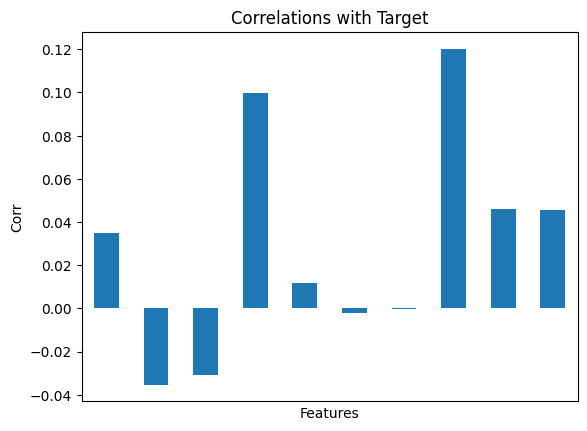

In [32]:
# Correlations with Target
correlations.plot(kind='bar')
plt.title('Correlations with Target')
plt.xlabel('Features')
plt.xticks([])
plt.ylabel('Corr')
plt.show()


### Save features, scaler and PCA

In [33]:
# Save list of features for the model
joblib.dump(selected_columns, '../models/list_of_features.joblib')
joblib.dump(scaler, '../models/scaler.joblib')
joblib.dump(pca, '../models/pca.joblib')
joblib.dump(X_transformed, '../data/X_training.joblib')
joblib.dump(y, '../data/y_training.joblib')

['../data/y_training.joblib']

In [34]:
print(len(selected_columns))

734
